# Cleaning and performing Exploratory Data Analysis on the scraped data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_context("talk")

In [2]:
# Loading and printing data
df = pd.read_csv('C:/Users/KubaPC/Desktop/mieszkaniaLodz/offers.csv')
df.head()

,Unnamed: 0,Url,Oferta,Cena,Oferta od,Poziom,Umeblowane,Rodzaj zabudowy,Powierzchnia,Liczba pokoi,...,Kaucja,Piętro,Liczba pięter,Materiał budynku,Okna,Ogrzewanie,Rok budowy,Stan wykończenia,Dostępne od,Obsługa zdalna
0,0,https://www.olx.pl/oferta/kawalerka-na-wynajem...,Kawalerka na wynajem. Bałuty,1 040 zł,Osoby prywatnej,2,Tak,Blok,22 m²,Kawalerka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.olx.pl/oferta/wakacje-30-rentaroom...,WAKACJE -30% RENTAROOM.PL Speak Eng Manufaktur...,850 zł,Biuro / Deweloper,Parter,Tak,Blok,18 m²,Kawalerka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.olx.pl/oferta/wynajme-mieszkanie-4...,Wynajme mieszkanie 48m2 2 pokoje Łódź ul.Gandh...,1 500 zł,Osoby prywatnej,2,Tak,Blok,48 m²,2 pokoje,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://www.olx.pl/oferta/2-pokoje-w-stylu-lof...,2 pokoje w stylu loft k. Manufaktury,1 400 zł,Osoby prywatnej,4,Tak,Blok,35 m²,2 pokoje,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://www.olx.pl/oferta/przytulna-kawalerka-...,Przytulna kawalerka. wysoki standard. ul. Uniw...,1 300 zł,Osoby prywatnej,1,Tak,Blok,20 m²,Kawalerka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Printing all column names
df.columns

Index(['Unnamed: 0', 'Url', 'Oferta', 'Cena', 'Oferta od', 'Poziom',
       'Umeblowane', 'Rodzaj zabudowy', 'Powierzchnia', 'Liczba pokoi',
       'Czynsz (dodatkowo)', 'Czynsz - dodatkowo', 'Kaucja', 'Piętro',
       'Liczba pięter', 'Materiał budynku', 'Okna', 'Ogrzewanie', 'Rok budowy',
       'Stan wykończenia', 'Dostępne od', 'Obsługa zdalna'],
      dtype='object')

Checking for the amount of missing data

In [4]:
for col in df.columns:
    missing = round(df[col].isna().sum()/len(df) * 100, 2)
    # Printing columns with over 75% of missing values in bold
    if missing > 75:
        print('\033[1m' + f'Column "{col}" has  \t\t {missing} % missing values' + '\033[0m')
    else:
        print(f'Column "{col}" has  \t\t {missing} % missing values')

Column "Unnamed: 0" has  		 0.0 % missing values
Column "Url" has  		 0.0 % missing values
Column "Oferta" has  		 0.0 % missing values
Column "Cena" has  		 0.0 % missing values
Column "Oferta od" has  		 11.5 % missing values
Column "Poziom" has  		 13.2 % missing values
Column "Umeblowane" has  		 11.5 % missing values
Column "Rodzaj zabudowy" has  		 0.0 % missing values
Column "Powierzchnia" has  		 0.0 % missing values
Column "Liczba pokoi" has  		 0.0 % missing values
Column "Czynsz (dodatkowo)" has  		 11.5 % missing values
Column "Czynsz - dodatkowo" has  		 89.64 % missing values
Column "Kaucja" has  		 90.2 % missing values
Column "Piętro" has  		 88.74 % missing values
Column "Liczba pięter" has  		 89.39 % missing values
Column "Materiał budynku" has  		 92.55 % missing values
Column "Okna" has  		 88.99 % missing values
Column "Ogrzewanie" has  		 89.23 % missing values
Column "Rok budowy" has  		 94.33 % missing values
Column "Stan wykończenia" has  		 89.07 % missing va

## Cleaning the data

From the names and amount of missing values, we can conclude which columns are close to irrelevant in terms of predicting prices of apartments and therefore we will drop them.

In [5]:
df.drop(['Unnamed: 0', 'Oferta od', 'Obsługa zdalna', 'Dostępne od', 'Kaucja', 'Liczba pięter',
         'Materiał budynku', 'Rok budowy', 'Ogrzewanie', 'Okna', 'Stan wykończenia', 'Rodzaj zabudowy'], axis=1, inplace=True)
df.head()

,Url,Oferta,Cena,Poziom,Umeblowane,Powierzchnia,Liczba pokoi,Czynsz (dodatkowo),Czynsz - dodatkowo,Piętro
0,https://www.olx.pl/oferta/kawalerka-na-wynajem...,Kawalerka na wynajem. Bałuty,1 040 zł,2,Tak,22 m²,Kawalerka,360 zł,NaN,NaN
1,https://www.olx.pl/oferta/wakacje-30-rentaroom...,WAKACJE -30% RENTAROOM.PL Speak Eng Manufaktur...,850 zł,Parter,Tak,18 m²,Kawalerka,250 zł,NaN,NaN
2,https://www.olx.pl/oferta/wynajme-mieszkanie-4...,Wynajme mieszkanie 48m2 2 pokoje Łódź ul.Gandh...,1 500 zł,2,Tak,48 m²,2 pokoje,480 zł,NaN,NaN
3,https://www.olx.pl/oferta/2-pokoje-w-stylu-lof...,2 pokoje w stylu loft k. Manufaktury,1 400 zł,4,Tak,35 m²,2 pokoje,450 zł,NaN,NaN
4,https://www.olx.pl/oferta/przytulna-kawalerka-...,Przytulna kawalerka. wysoki standard. ul. Uniw...,1 300 zł,1,Tak,20 m²,Kawalerka,210 zł,NaN,NaN


It seems like columns 'Czynsz (dodatkowo)' and 'Czynsz - dodatkowo' can be merged together since they give the same information, probably depending on the site they were scraped from. Before joining them together, we have to check whether there is any offer with them given both at the same time

In [6]:
df[(df['Czynsz (dodatkowo)'].notnull()) & (df['Czynsz - dodatkowo'].notnull())]

,Url,Oferta,Cena,Poziom,Umeblowane,Powierzchnia,Liczba pokoi,Czynsz (dodatkowo),Czynsz - dodatkowo,Piętro


In [7]:
# Filling null values with zeros to perform addition
df['Czynsz (dodatkowo)'].fillna('0', inplace=True)
df['Czynsz - dodatkowo'].fillna('0', inplace=True)

In [8]:
# Converting data into floats, getting rid of currency signs
df['Czynsz (dodatkowo)'] = df['Czynsz (dodatkowo)'].apply(lambda x: float(x.split(' zł')[0].replace(',', '.').replace(' ', '')))
df['Czynsz - dodatkowo'] = df['Czynsz - dodatkowo'].apply(lambda x: float(x.split(' zł')[0].replace(',', '.').replace(' ', '')))
df['Cena'] = df['Cena'].apply(lambda x: float(x.split(' zł')[0].replace(',', '.').replace(' ', '')))

In [9]:
# Summing columns, dropping unnecesary ones
df['Cena'] = df['Cena'] + df['Czynsz - dodatkowo'] + df['Czynsz (dodatkowo)']
df.drop(['Czynsz - dodatkowo', 'Czynsz (dodatkowo)'], axis=1, inplace=True)

In [10]:
df.head()

,Url,Oferta,Cena,Poziom,Umeblowane,Powierzchnia,Liczba pokoi,Piętro
0,https://www.olx.pl/oferta/kawalerka-na-wynajem...,Kawalerka na wynajem. Bałuty,1400.0,2,Tak,22 m²,Kawalerka,NaN
1,https://www.olx.pl/oferta/wakacje-30-rentaroom...,WAKACJE -30% RENTAROOM.PL Speak Eng Manufaktur...,1100.0,Parter,Tak,18 m²,Kawalerka,NaN
2,https://www.olx.pl/oferta/wynajme-mieszkanie-4...,Wynajme mieszkanie 48m2 2 pokoje Łódź ul.Gandh...,1980.0,2,Tak,48 m²,2 pokoje,NaN
3,https://www.olx.pl/oferta/2-pokoje-w-stylu-lof...,2 pokoje w stylu loft k. Manufaktury,1850.0,4,Tak,35 m²,2 pokoje,NaN
4,https://www.olx.pl/oferta/przytulna-kawalerka-...,Przytulna kawalerka. wysoki standard. ul. Uniw...,1510.0,1,Tak,20 m²,Kawalerka,NaN


There is a similar story with columns 'Piętro' and 'Poziom', both meaning floors. However we can see that some values are numerical and some are descriptive.

In [11]:
print(df['Piętro'].unique())
print(df['Poziom'].unique())

[nan ' 7' ' 4' ' 3' ' 1' ' 2' ' 6' ' parter' ' 5' ' 10' ' 9' ' > 10' ' 8']
['2' 'Parter' '4' '1' '6' '3' nan '9' '7' '5' '8' 'Powyżej 10' '10']


In [12]:
# Making a dictionary to change descriptive values
replace = {'Parter': '0', ' parter': '0', ' > 10': '11', 'Powyżej 10': '11'}

In [13]:
df[(df['Poziom'].notnull()) & (df['Piętro'].notnull())]

,Url,Oferta,Cena,Poziom,Umeblowane,Powierzchnia,Liczba pokoi,Piętro


In [14]:
# Filling missing values with zeros
df['Poziom'].fillna('0', inplace=True)
df['Piętro'].fillna('0', inplace=True)

In [15]:
# Changing descriptive values to numerical and changing type of data to int
df['Poziom'] = df['Poziom'].apply(lambda x: int(replace[x]) if x in replace else int(x))
df['Piętro'] = df['Piętro'].apply(lambda x: int(replace[x]) if x in replace else int(x))

In [16]:
# Summing columns, dropping unnecesary ones
df['Piętro'] = df['Piętro'] + df['Poziom']
df.drop(['Piętro', 'Poziom'], axis=1, inplace=True)

In [17]:
df.head()

,Url,Oferta,Cena,Umeblowane,Powierzchnia,Liczba pokoi
0,https://www.olx.pl/oferta/kawalerka-na-wynajem...,Kawalerka na wynajem. Bałuty,1400.0,Tak,22 m²,Kawalerka
1,https://www.olx.pl/oferta/wakacje-30-rentaroom...,WAKACJE -30% RENTAROOM.PL Speak Eng Manufaktur...,1100.0,Tak,18 m²,Kawalerka
2,https://www.olx.pl/oferta/wynajme-mieszkanie-4...,Wynajme mieszkanie 48m2 2 pokoje Łódź ul.Gandh...,1980.0,Tak,48 m²,2 pokoje
3,https://www.olx.pl/oferta/2-pokoje-w-stylu-lof...,2 pokoje w stylu loft k. Manufaktury,1850.0,Tak,35 m²,2 pokoje
4,https://www.olx.pl/oferta/przytulna-kawalerka-...,Przytulna kawalerka. wysoki standard. ul. Uniw...,1510.0,Tak,20 m²,Kawalerka


Similar steps need to be done with 'Liczba pokoi' (number of rooms)

In [18]:
df['Liczba pokoi'].unique()

array(['Kawalerka', '2 pokoje', '4 i więcej', ' 3', '3 pokoje', ' 2',
       ' 4', ' 1'], dtype=object)

In [19]:
replace = {'Kawalerka': '1', '2 pokoje': '2', '3 pokoje': '3', '4 i więcej': '4'}
df['Liczba pokoi'] = df['Liczba pokoi'].apply(lambda x: int(replace[x]) if x in replace else int(x))

Converting 'Powierzchnia' (area) to numerical value, skipping square meters

In [20]:
df['Powierzchnia'] = df['Powierzchnia'].apply(lambda x: float(x.split('m')[0].replace(',', '.')))

After checking missing values in 'Umeblowane' column (Furnished), we can conclude that vast majority of offers is Furnished, therefore we will assign '1' to them and one-hot encode the rest.

In [21]:
df[df['Umeblowane'].isnull()]

,Url,Oferta,Cena,Umeblowane,Powierzchnia,Liczba pokoi
22,https://www.otodom.pl/oferta/do-wynajecia-w-ce...,Do wynajęcia w centrum Łodzi - Manhattan,2150.0,NaN,62.00,3
33,https://www.otodom.pl/oferta/lodz-retkinia-3-p...,Łódź. Retkinia. 3 pokojowe. umeblowane,1942.0,NaN,53.00,3
45,https://www.otodom.pl/oferta/wynajme-mieszkani...,Wynajme mieszkanie łódź Retkinia,1700.0,NaN,42.42,2
62,https://www.otodom.pl/oferta/nowe-4-pokojowe-m...,Nowe 4-pokojowe mieszkanie z balkonem bez prow...,2780.0,NaN,78.00,4
95,https://www.otodom.pl/oferta/wynajme-mieszkani...,Wynajmę mieszkanie o wysokim standardzie,2800.0,NaN,52.00,2
...,...,...,...,...,...,...
1223,https://www.otodom.pl/oferta/kawalerka-w-centr...,Kawalerka w centrum idealna na biuro,1850.0,NaN,45.00,1
1225,https://www.otodom.pl/oferta/przytule-mieszkan...,Przytule mieszkanie. ul. Targowa. 40m2. 2 pokoje,1300.0,NaN,40.00,2
1227,https://www.otodom.pl/oferta/ilumino-kilinskie...,Ilumino Kilińskiego 3 pokoje Balkon Centrum Łódź,2690.0,NaN,57.63,3
1230,https://www.otodom.pl/oferta/solaris-park-tuwi...,Solaris Park Tuwima 3pokoje Basen Rewelacyjna ...,3020.0,NaN,67.97,3


In [22]:
df['Umeblowane'] = df['Umeblowane'].fillna(1)
replace = {'Tak': 1, 'Nie': 0}
df['Umeblowane'] = df['Umeblowane'].apply(lambda x: replace[x] if x in replace else x)

In [23]:
# Checking types of data in columns
df.dtypes

Url              object
Oferta           object
Cena            float64
Umeblowane        int64
Powierzchnia    float64
Liczba pokoi      int64
dtype: object

In order to reduce the memory usage and due to the fact that our int values are fairly small, we can convert them to int32

In [24]:
df['Cena'] = df['Cena'].astype(int)
df['Umeblowane'] = df['Umeblowane'].astype(int)
df['Liczba pokoi'] = df['Liczba pokoi'].astype(int)

In [25]:
df.dtypes

Url              object
Oferta           object
Cena              int32
Umeblowane        int32
Powierzchnia    float64
Liczba pokoi      int32
dtype: object

## EDA with further cleaning

Investigating presence of outliers

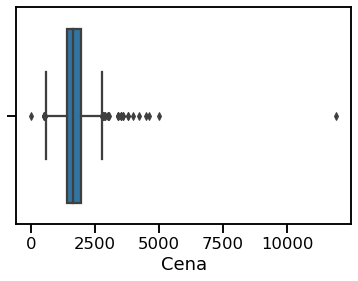

In [26]:
sns.boxplot(df['Cena'])
plt.show()

During data analysis, especially during its manipulation, we have to take some experience in particular field into consideration. Thus we will spare some of the data exceeding typical 'Q3 + 1.5 x IQR' range, since it makes sense that some apartments are at lowest or highest cost.<br>
Instead we will drop the least probable prices, laying at 0.01 and 0.99 quantile - 810 to 3500 PLN seems like the most probable price for most of the apartments.

In [27]:
lower, upper = df['Cena'].quantile([.01, .99])
print('range', (lower, upper))

range (810.4, 3466.000000000008)


In [28]:
df = df[(df['Cena'] > lower) & (df['Cena'] < upper)]

Data after cleaning

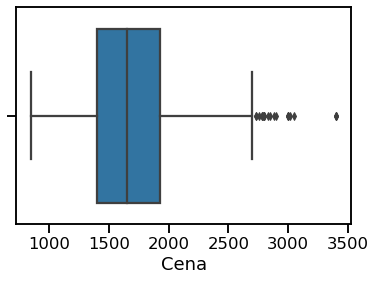

In [29]:
sns.boxplot(df['Cena'])
plt.show()

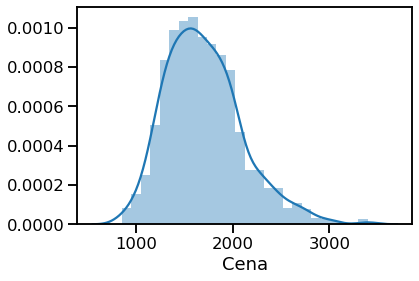

In [30]:
sns.distplot(df['Cena'])

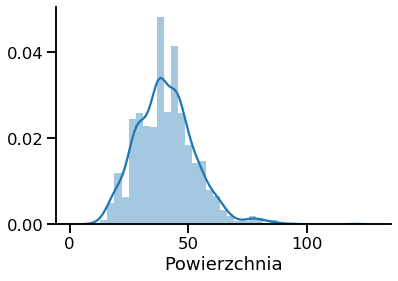

In [31]:
sns.distplot(df['Powierzchnia'])
sns.set_context("poster")
sns.despine()
plt.show()

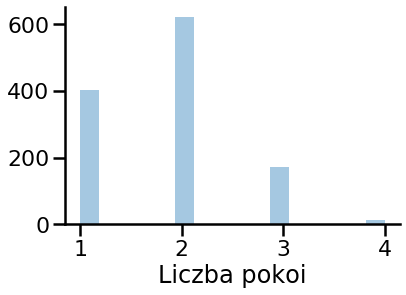

In [32]:
ax = sns.distplot(df['Liczba pokoi'], kde=False)
ax.set(xticks=[1, 2, 3, 4])
sns.despine()
plt.show()

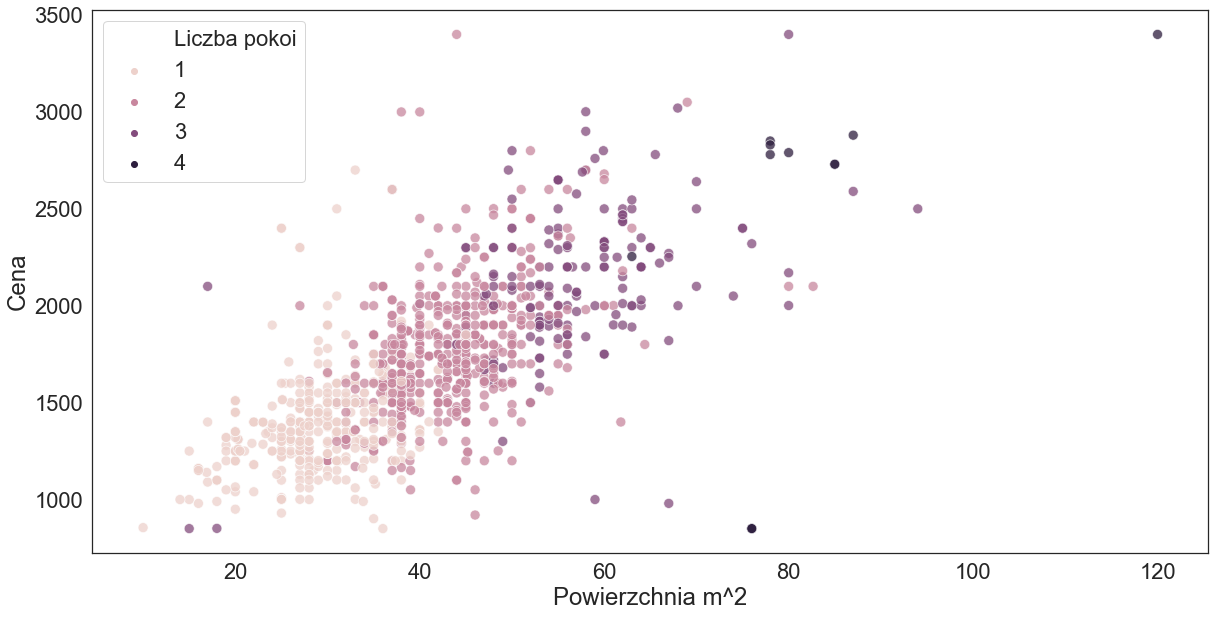

In [33]:
plt.figure(figsize=(20, 10))
ax = sns.set(font_scale=2)
ax = sns.set_style('white')
ax = sns.scatterplot(x='Powierzchnia', y='Cena', hue='Liczba pokoi', data=df, s=100, alpha=0.75)
plt.xlabel('Powierzchnia m^2')
plt.show()

In [34]:
df.to_csv('C:/Users/KubaPC/Desktop/mieszkaniaLodz/offersFormatted.csv')